In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [18]:
def ftcs(T, nt, alpha, dt, dx, dy):
    
    # force j_mid and i_mid to be integers so we can use them as
    # indices for the array T
    j_mid = int((np.shape(T)[0])/2)
    i_mid = int((np.shape(T)[1])/2)
    
    for n in range(nt):
        Tn = T.copy()
        T[1:-1,1:-1] = Tn[1:-1,1:-1] + alpha *\
            (dt/dy**2 * (Tn[2:,1:-1] - 2*Tn[1:-1,1:-1] +\
             Tn[:-2,1:-1]) + dt/dx**2 * (Tn[1:-1,2:] - \
             2*Tn[1:-1,1:-1] + Tn[1:-1,:-2]))
        
        # Enforce Neumann BCs
        T[-1,:] = T[-2,:]
        T[:,-1] = T[:,-2]
        
        # Check if we reached T=70C
        if T[j_mid, i_mid] >= 70:
            print("Centre of plate reached 70C at time {0:.2f}s.".format(dt*n))
            break
            
        if T[j_mid, i_mid]<70:
            print("Centre has not reached 70C yet, it is only {0:.2f}C.".format(T[j_mid, i_mid]))
        
    return T

In [19]:
L = 1.0e-2
H = 1.0e-2

nx = 21
ny = 21
nt = 500

dx = L/(nx-1)
dy = H/(ny-1)

x = np.linspace(0,L,nx)
y = np.linspace(0,H,ny)

alpha = 1e-4

Ti = np.ones((ny, nx))*20
Ti[0,:] = 100
Ti[:,0] = 100

In [20]:
# stability
sigma = 0.25
dt = sigma * min(dx, dy)**2 / alpha
T = ftcs(Ti.copy(), nt, alpha, dt, dx, dy)

Centre has not reached 70C yet, it is only 20.00C.
Centre has not reached 70C yet, it is only 20.00C.
Centre has not reached 70C yet, it is only 20.00C.
Centre has not reached 70C yet, it is only 20.00C.
Centre has not reached 70C yet, it is only 20.00C.
Centre has not reached 70C yet, it is only 20.00C.
Centre has not reached 70C yet, it is only 20.00C.
Centre has not reached 70C yet, it is only 20.00C.
Centre has not reached 70C yet, it is only 20.00C.
Centre has not reached 70C yet, it is only 20.00C.
Centre has not reached 70C yet, it is only 20.00C.
Centre has not reached 70C yet, it is only 20.00C.
Centre has not reached 70C yet, it is only 20.01C.
Centre has not reached 70C yet, it is only 20.02C.
Centre has not reached 70C yet, it is only 20.03C.
Centre has not reached 70C yet, it is only 20.05C.
Centre has not reached 70C yet, it is only 20.08C.
Centre has not reached 70C yet, it is only 20.12C.
Centre has not reached 70C yet, it is only 20.17C.
Centre has not reached 70C yet,

## Visualize the results

In [21]:
mx, my = np.meshgrid(x,y)

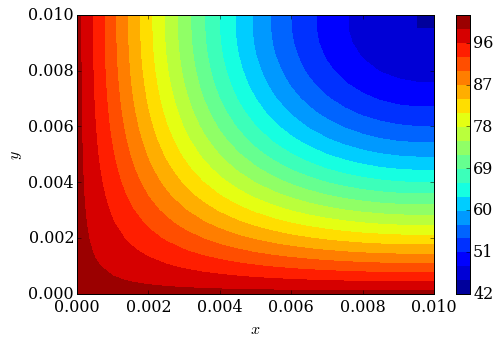

In [22]:
plt.figure(figsize=(8,5))
plt.contourf(mx,my,T,20)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.colorbar();

## Heat Sink